# Análise da qualidade de segmentação em função de características dos dados

1. Utilizar o modelo EncoderDecoder treinado na disciplina ou treinado pelo grupo
2. Identificar as 10 imagens com pior qualidade de segmentação segundo a métrica IoU. Discutir quais problemas ocorrem na segmentação dessas imagens
3. Calcular o valor da métrica IoU, precisão e revocação em função do tamanho (área) dos objetos nas imagens. Mostrar os resultados na forma de gráficos de dispersão *métrica x tamanho* (6 gráficos no total)
4. Calcular a métrica IoU considerando apenas as regiões de borda dos objetos
5. Treinar o modelo EncoderDecoder utilizando os valores de loss apenas do contorno do objeto e do fundo. Discutir os resultados.

Código para calcular as métricas: https://github.com/chcomin/curso-visao-computacional-2024/blob/main/M07_segmentacao/train.py#L23

Cálculo da área dos objetos

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import scipy.ndimage as ndi

target = Image.open('../../Aulas/data/oxford_pets/annotations/trimaps/Abyssinian_1.png')
target = np.array(target)

obj_area = (target==1).size
obj_area

240000

Identificação da região de borda

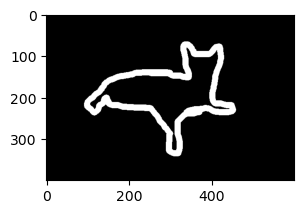

In [1]:
plt.imshow(target==3, 'gray')

Cálculo do contorno do objeto e do fundo

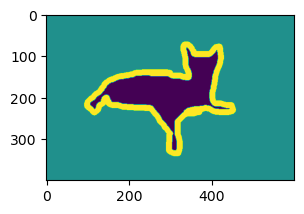

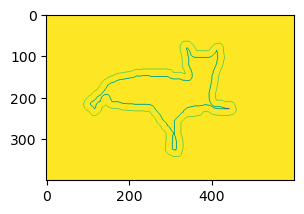

In [2]:
img_obj = target==1
img_back = target==2
obj_border = img_obj ^ ndi.binary_erosion(img_obj, border_value=1)
back_border = img_back ^ ndi.binary_erosion(img_back, border_value=1)

# Imagem com valor 1 para a borda do objeto, 2 para a borda do fundo e
# 3 para pixeis a serem ignorados
target_cont = np.full_like(target, 3)
target_cont[obj_border] = 1
target_cont[back_border] = 2

plt.imshow(target)
plt.figure()
plt.imshow(target_cont)